In [3]:
%load_ext autoreload
%autoreload 2

In [2]:
import torchaudio
from speechbrain.pretrained import EncoderClassifier
classifier = EncoderClassifier.from_hparams(source="speechbrain/lang-id-commonlanguage_ecapa", savedir="pretrained_models/lang-id-commonlanguage_ecapa")
# Italian Example
out_prob, score, index, text_lab = classifier.classify_file('speechbrain/lang-id-commonlanguage_ecapa/example-it.wav')
print(text_lab)

# French Example
out_prob, score, index, text_lab = classifier.classify_file('speechbrain/lang-id-commonlanguage_ecapa/example-fr.wav')
print(text_lab)


torchvision is not available - cannot save figures


['Italian']
['French']


/Users/oadams/.pyenv/versions/3.11.6/envs/sigtyp/lib/python3.11/site-packages/speechbrain/dataio/encoder.py:722: UserWarning: CategoricalEncoder.expect_len was never called: assuming category count of 45 to be correct! Sanity check your encoder using `.expect_len`. Ensure that downstream code also uses the correct size. If you are sure this does not apply to you, use `.ignore_len`.
  warnings.warn(


In [4]:
import lang2vec.lang2vec as l2v
features = l2v.get_features("eng", "geo")
features["eng"]
l2v.distance("syntactic", "eng", "fra")

0.46

In [5]:
from pathlib import Path
import torch
import tqdm


In [6]:
langs = []
embs = []
for path in tqdm.tqdm(list(Path('common_voice_kpd').glob('*'))):
    langs.append(path.name)
    print(path.name)
    emb = torch.load(f'lang_embs_2/{path.name}_test_emb.pt')
    emb = emb.squeeze(1).mean(0)
    embs.append(emb)
    print(emb.shape)

100%|██████████| 45/45 [00:00<00:00, 6213.78it/s]

Sakha
torch.Size([192])
Dhivehi
torch.Size([192])
Dutch
torch.Size([192])
Interlingua
torch.Size([192])
Breton
torch.Size([192])
Czech
torch.Size([192])
Esperanto
torch.Size([192])
Catalan
torch.Size([192])
Latvian
torch.Size([192])
Japanese
torch.Size([192])
German
torch.Size([192])
Estonian
torch.Size([192])
Chinese_Taiwan
torch.Size([192])
Tatar
torch.Size([192])
Kinyarwanda
torch.Size([192])
Frisian
torch.Size([192])
Welsh
torch.Size([192])
Hakha_Chin
torch.Size([192])
Romanian
torch.Size([192])
Turkish
torch.Size([192])
Russian
torch.Size([192])
Maltese
torch.Size([192])
Georgian
torch.Size([192])
Chuvash
torch.Size([192])
Mangolian
torch.Size([192])
Italian
torch.Size([192])
English
torch.Size([192])
Greek
torch.Size([192])
Portuguese
torch.Size([192])
Kyrgyz
torch.Size([192])
Chinese_Hongkong
torch.Size([192])
Slovenian
torch.Size([192])
Polish
torch.Size([192])
French
torch.Size([192])
Swedish
torch.Size([192])
Romansh_Sursilvan
torch.Size([192])
Kabyle
torch.Size([192])
Spanis

In [7]:
embs = torch.stack(embs)

In [8]:
embs = torch.nn.functional.normalize(embs, dim=1)

In [9]:
sims = embs @ embs.T

In [10]:
# Flatten the matrix to a 1D tensor and get indices that would sort it
flattened_indices = torch.argsort(sims.view(-1))

In [11]:
sims.argmax(dim=None)

tensor(552)

In [12]:
# Flatten the matrix to perform sorting
flattened_matrix = sims.view(-1)  # Flatten the 2D matrix into a 1D tensor
sorted_indices = torch.argsort(flattened_matrix, dim=0)

# Retrieve row and column indices based on sorted indices
row_indices = sorted_indices // sims.shape[1]
col_indices = sorted_indices % sims.shape[1]

In [ ]:
def speechbrain_distance(lang1, lang2):
    lang1code = 

In [13]:
for a, b in list(zip(row_indices, col_indices)):
    if a >= b:
        continue
    print(langs[a.item()], langs[b.item()], sims[a, b])

Czech Kyrgyz tensor(-0.1178)
Dhivehi Greek tensor(-0.1090)
Czech Kabyle tensor(-0.1071)
Japanese Romanian tensor(-0.0959)
Hakha_Chin Swedish tensor(-0.0933)
Czech Turkish tensor(-0.0924)
Czech Japanese tensor(-0.0898)
Hakha_Chin Portuguese tensor(-0.0889)
Frisian Hakha_Chin tensor(-0.0810)
Estonian Polish tensor(-0.0775)
Japanese Frisian tensor(-0.0765)
Dutch German tensor(-0.0711)
Dhivehi Czech tensor(-0.0704)
Chuvash English tensor(-0.0634)
Tamil Indonesian tensor(-0.0621)
Greek Tamil tensor(-0.0575)
Dhivehi Polish tensor(-0.0564)
Czech Tatar tensor(-0.0562)
Japanese Arabic tensor(-0.0551)
Dutch Swedish tensor(-0.0546)
Czech Chinese_Taiwan tensor(-0.0522)
Japanese Georgian tensor(-0.0514)
Czech English tensor(-0.0478)
Japanese Kabyle tensor(-0.0458)
Dhivehi Tatar tensor(-0.0458)
Polish Tamil tensor(-0.0448)
Georgian Romansh_Sursilvan tensor(-0.0410)
Romansh_Sursilvan Tamil tensor(-0.0410)
Polish Swedish tensor(-0.0395)
Czech French tensor(-0.0387)
Sakha Slovenian tensor(-0.0384)
Sakh

In [14]:
import lang2vec.lang2vec as l2v

In [15]:
l2v.LANGUAGES

{'khb',
 'tml',
 'afe',
 'nop',
 'kcn',
 'shi',
 'afr',
 'nnb',
 'tks',
 'ztq',
 'gkn',
 'mnx',
 'ano',
 'bix',
 'bcl',
 'nyt',
 'bqq',
 'kle',
 'slp',
 'epo',
 'kdl',
 'fra',
 'nbe',
 'qqs',
 'ton',
 'rim',
 'zpv',
 'bax',
 'daz',
 'boz',
 'shj',
 'lao',
 'pio',
 'caj',
 'wos',
 'kxw',
 'gsw',
 'ape',
 'ian',
 'wuv',
 'cdj',
 'cwb',
 'bwz',
 'aby',
 'pos',
 'agj',
 'cot',
 'mxb',
 'ans',
 'tpa',
 'xsb',
 'lax',
 'nit',
 'div',
 'arn',
 'mnc',
 'hoa',
 'tmu',
 'war',
 'wsa',
 'agc',
 'ryu',
 'sva',
 'irh',
 'tbo',
 'mrf',
 'cht',
 'tuq',
 'lme',
 'yll',
 'chu',
 'bgi',
 'dru',
 'kvk',
 'ggd',
 'kgq',
 'chz',
 'rji',
 'ali',
 'bfl',
 'bqm',
 'bnq',
 'hla',
 'png',
 'brz',
 'bth',
 'chn',
 'cib',
 'cna',
 'nkf',
 'tnd',
 'bdr',
 'mhr',
 'cbc',
 'jeb',
 'tgo',
 'bau',
 'cto',
 'npa',
 'azz',
 'bdh',
 'gwd',
 'nhi',
 'mua',
 'abb',
 'crv',
 'snf',
 'kin',
 'wgy',
 'kjj',
 'srn',
 'gld',
 'khv',
 'tta',
 'nal',
 'txq',
 'blj',
 'toq',
 'bhu',
 'rai',
 'caw',
 'bao',
 'oma',
 'abh',
 'amq',


In [44]:
code2lang = {code: lang for lang, code in language_codes.items()}

In [16]:
language_codes = {
    "Arabic": "ara",
    "Basque": "eus",
    "Breton": "bre",
    "Catalan": "cat",
    "Chinese_China": "zho",
    "Chinese_Hongkong": "zho",
    "Chinese_Taiwan": "zho",
    "Chuvash": "chv",
    "Czech": "ces",
    "Dhivehi": "div",
    "Dutch": "nld",
    "English": "eng",
    "Esperanto": "epo",
    "Estonian": "est",
    "French": "fra",
    "Frisian": "fry",
    "Georgian": "kat",
    "German": "deu",
    "Greek": "ell",
    "Hakha_Chin": "cnr",  # No specific code in ISO 639-3, using ISO 639-2 code
    "Indonesian": "ind",
    "Interlingua": "ina",
    "Italian": "ita",
    "Japanese": "jpn",
    "Kabyle": "kab",
    "Kinyarwanda": "kin",
    "Kyrgyz": "kir",
    "Latvian": "lav",
    "Maltese": "mlt",
    "Mangolian": "mon",
    "Persian": "fas",
    "Polish": "pol",
    "Portuguese": "por",
    "Romanian": "ron",
    "Romansh_Sursilvan": "roh",
    "Russian": "rus",
    "Sakha": "sah",
    "Slovenian": "slv",
    "Spanish": "spa",
    "Swedish": "swe",
    "Tamil": "tam",
    "Tatar": "tat",
    "Turkish": "tur",
    "Ukranian": "ukr",
    "Welsh": "cym"
}


In [17]:
l2v.phonological_distance(language_codes['Russian'], language_codes["Russian"])

0.0

In [18]:
import pandas as pd
from collections import defaultdict

In [19]:
print(langs)

['Sakha', 'Dhivehi', 'Dutch', 'Interlingua', 'Breton', 'Czech', 'Esperanto', 'Catalan', 'Latvian', 'Japanese', 'German', 'Estonian', 'Chinese_Taiwan', 'Tatar', 'Kinyarwanda', 'Frisian', 'Welsh', 'Hakha_Chin', 'Romanian', 'Turkish', 'Russian', 'Maltese', 'Georgian', 'Chuvash', 'Mangolian', 'Italian', 'English', 'Greek', 'Portuguese', 'Kyrgyz', 'Chinese_Hongkong', 'Slovenian', 'Polish', 'French', 'Swedish', 'Romansh_Sursilvan', 'Kabyle', 'Spanish', 'Tamil', 'Persian', 'Indonesian', 'Arabic', 'Ukranian', 'Basque', 'Chinese_China']


In [40]:
def similarity_df(distance_functions):
    d = defaultdict(list)
    langpairs = []
    for i in range(len(langs)):
        for j in range(len(langs)):
            if i >= j:
                continue
            forget_it = False
            for f in distance_functions:
                try:
                    d[f.__name__].append(f(language_codes[langs[i]], language_codes[langs[j]]))
                except:
                    forget_it = True
                    break
            if not forget_it:
                langpairs.append((langs[i], langs[j]))
        break
    df = pd.DataFrame(d, index=langpairs)
    return df

In [41]:
df = similarity_df([l2v.phonological_distance, l2v.inventory_distance])

In [42]:
import seaborn as sns

<Axes: xlabel='phonological_distance', ylabel='inventory_distance'>

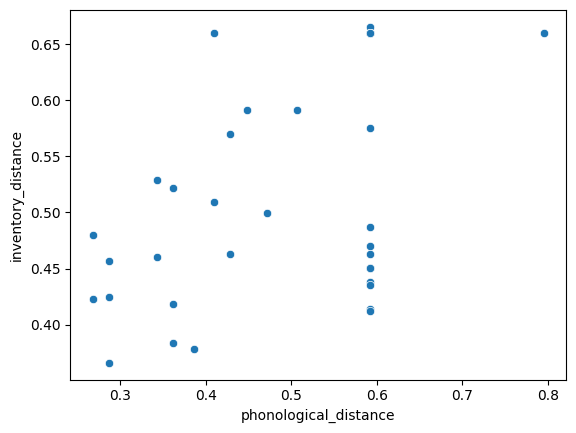

In [43]:
sns.scatterplot(data=df, x='phonological_distance', y='inventory_distance')


KeyError: 0

In [38]:
dir(l2v.phonological_distance)

['__annotations__',
 '__builtins__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__getstate__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [39]:
l2v.phonological_distance.__name__

'phonological_distance'

In [1]:
import similarity
import lang2vec.lang2vec as l2v
import seaborn as sns

torchvision is not available - cannot save figures
100%|██████████| 45/45 [00:00<00:00, 6058.80it/s]

['Sakha', 'Dhivehi', 'Dutch', 'Interlingua', 'Breton', 'Czech', 'Esperanto', 'Catalan', 'Latvian', 'Japanese', 'German', 'Estonian', 'Chinese_Taiwan', 'Tatar', 'Kinyarwanda', 'Frisian', 'Welsh', 'Hakha_Chin', 'Romanian', 'Turkish', 'Russian', 'Maltese', 'Georgian', 'Chuvash', 'Mangolian', 'Italian', 'English', 'Greek', 'Portuguese', 'Kyrgyz', 'Chinese_Hongkong', 'Slovenian', 'Polish', 'French', 'Swedish', 'Romansh_Sursilvan', 'Kabyle', 'Spanish', 'Tamil', 'Persian', 'Indonesian', 'Arabic', 'Ukranian', 'Basque', 'Chinese_China']


In [2]:
df = similarity.distance_df([similarity.speechbrain_distance, l2v.inventory_distance, l2v.geographic_distance])
df 

100%|██████████| 45/45 [09:38<00:00, 12.86s/it]


,speechbrain_distance,inventory_distance,geographic_distance
"(Sakha, Dhivehi)",0.789478,0.6597,0.4
"(Sakha, Dutch)",0.927734,0.4382,0.3
"(Sakha, Interlingua)",0.784451,0.6597,0.4
"(Sakha, Breton)",0.831743,0.4242,0.4
"(Sakha, Czech)",0.943489,0.4140,0.3
...,...,...,...
"(Arabic, Basque)",0.853499,0.6690,1.0
"(Arabic, Chinese_China)",0.898803,0.0000,1.0
"(Ukranian, Basque)",0.932114,0.5715,0.1
"(Ukranian, Chinese_China)",0.931759,0.6737,1.0


<Axes: xlabel='speechbrain_distance', ylabel='inventory_distance'>

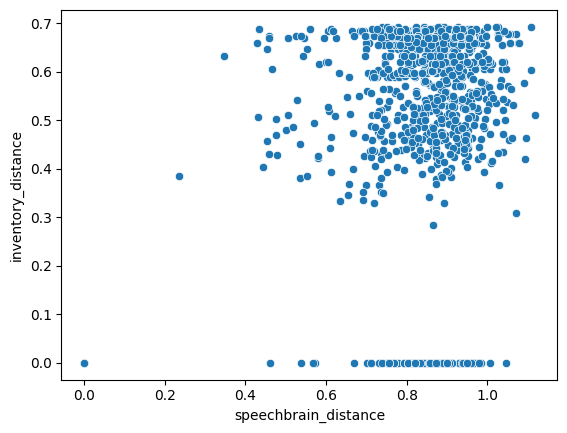

In [4]:
sns.scatterplot(data=df, x='speechbrain_distance', y='inventory_distance')

In [5]:
# Apply the default theme
sns.set_theme()


<Axes: xlabel='speechbrain_distance', ylabel='inventory_distance'>

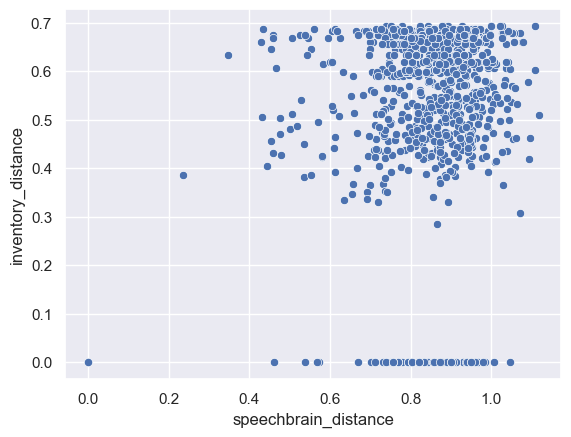

In [8]:
sns.scatterplot(data=df, x='speechbrain_distance', y='inventory_distance')

In [11]:
import scipy
r = scipy.stats.pearsonr(x=df.speechbrain_distance, y=df.inventory_distance)[0]

In [12]:
r

0.0847966962265832

In [4]:
import similarity
import seaborn as sns
sns.set_theme()

In [2]:
atds = similarity.load_atds_sims()
speechbrain = similarity.compute_speechbrain_similarities()
df = atds.join(speechbrain.set_index(['ref_lang', 'comp_lang']), on=['ref_lang', 'comp_lang'])

100%|██████████| 15/15 [00:00<00:00, 826.12it/s]

['malay', 'gujarati', 'iban', 'setswana', 'urdu', 'punjabi', 'marathi', 'sepedi', 'odia', 'indonesian', 'tamil', 'hindi', 'malayalam', 'sesotho', 'bengali']


<Axes: xlabel='speechbrain_similarity', ylabel='atds'>

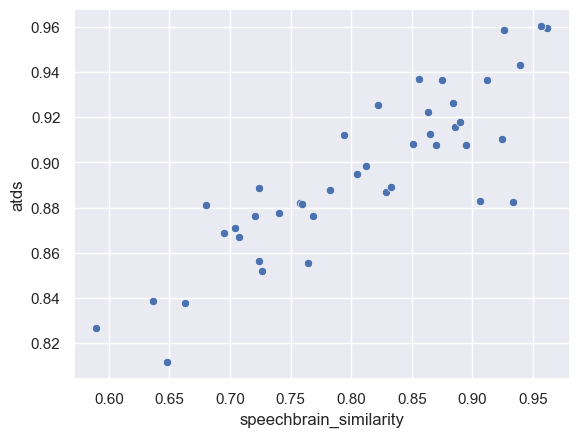

In [5]:
sns.scatterplot(data=df, x='speechbrain_similarity', y='atds')

In [7]:
import scipy
r = scipy.stats.pearsonr(x=df.speechbrain_similarity, y=df.atds)[0]
r

0.8627952923318866